<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/a/aa/Logo_DuocUC.svg/2560px-Logo_DuocUC.svg.png' width=50%, height=20%>




Informe Tecnico

Integrantes: Pamela Aldana<br>
             Jacknel Bernard

Docente. Carlos Correa
Asignatura: Deeo Learning





#**Contexto del caso Forma A**.

Deberá ser capaz de implementar un proyecto de Deep Learning, entrenando un modelo ajustado a partir de los datos entregados
para este caso. Desarrollará el proyecto utilizando las etapas de metodología CRISP.DM, para la toma de las mejores decisiones
de la ejecución del proyecto.<br>
Este caso propone la utilización de Deep Learning para la clasificación de imágenes de prendas de vestir.<br>
Para contextualizar el caso, las empresas de moda han utilizado Deep Learning en su comercio electrónico para resolver muchos
problemas, como el reconocimiento de ropa, la búsqueda de ropa y la recomendación. <br>Un paso central para todas estas
implementaciones es la clasificación de imágenes. <br>Sin embargo, la clasificación de la ropa es una tarea desafiante ya que la ropa
tiene muchas propiedades y la profundidad de la categorización de la ropa es muy complicada.<br><br>
Para este caso utilizaremos un conjunto de datos denominado Fashion-MNIST, <br>Tiene  de imágenes en escala de grises de baja resolucion (28X28)pixeles
<br>70 000 productos de moda de 10 categorías, con 7000 imágenes por categoría.<br> El conjunto de entrenamiento tiene 60 000
imágenes y el conjunto de prueba tiene 10 000 imágenes. <br>Fashion-MNIST está destinado a servir como un reemplazo directo del
conjunto de datos MNIST original para comparar algoritmos de aprendizaje automático, ya que comparte el mismo tamaño de
imagen, formato de datos y la estructura de las divisiones de entrenamiento y prueba. El conjunto de datos está disponible
gratuitamente en https://github.com/zalandoresearch/fashion-mnist.

#FASE 1 :COMPRENDER EL NEGOCIO

Utilizaremos Tensor Flow  junto a Keras para programar varias Redes Neuronales  con el fin de predecir imágenes de ropa que estan clasificadas en 10 clases que son : 'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot. Para esto vamos a disponer del Fashion MNIST dataset. Este dataset está separado en 60000 imágenes de entrenamiento y 10000 para el test,los cuales pueden ser obtenidos desde el tf.keras.

#FASE 2 :COMPRENDER LOS DATOS

**Importar Libreria**

In [ ]:
# Importar las bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.regularizers import L2
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import LSTM, Dense, Dropout, InputLayer

**Carga de datos**

In [ ]:

# Carga de datos
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


#FASE 3 PREPARACION DE LOS DATOS

##Preprocesamiento de datos

El set de datos debe ser pre-procesada antes de entrenar la red


In [ ]:

# Normalización de los datos
train_images = train_images / 255.0
test_images = test_images / 255.0

# Cambiar la forma de los datos para que cada imagen tenga una dimensión adicional
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# Convertir etiquetas a categorías one-hot
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


#FASE 4  MODELADO

#**1 Modelo RNN LSTM Básico**

---
* InputLayer: Maneja imágenes de 28x28 como secuencias.
---
* LSTM(50, input_shape=(28, 28)): Una capa LSTM con 50 unidades. Procesa secuencias de entrada de 28x28.
---
* Dense(10, activation='softmax'): Capa densa de salida con 10 unidades (para clasificación de 10 clases).
---
* Optimizador: Adam, un optimizador eficiente para este tipo de redes.
Función de Pérdida: Categorical Crossentropy.
---
* Épocas: 10
---

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 50)                15800     
                                                                 
 dense_12 (Dense)            (None, 10)                510       
                                                                 
Total params: 16310 (63.71 KB)
Trainable params: 16310 (63.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
938/938 [==============================] - 24s 22ms/step - loss: 0.6843 - accuracy: 0.7570 - val_loss: 0.5190 - val_accuracy: 0.8156
Epoch 2/10
938/938 [==============================] - 20s 21ms/step - loss: 0.4667 - accuracy: 0.8314 - val_loss: 0.4603 - val_accuracy: 0.8336
Epoch 3/10
938/938 [==============================] - 19s 20ms/step - loss: 0.4169 - accuracy: 0.8485 - val_loss: 0.4102 - val

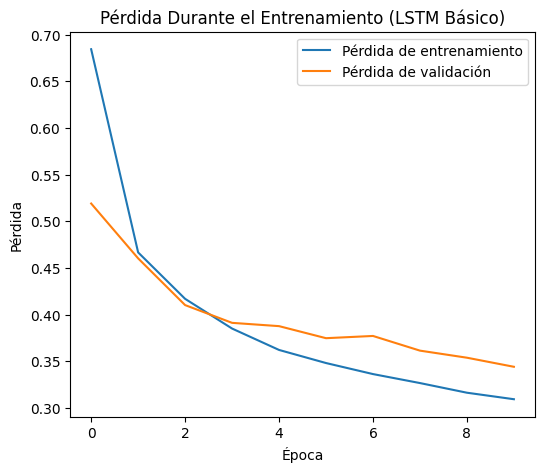

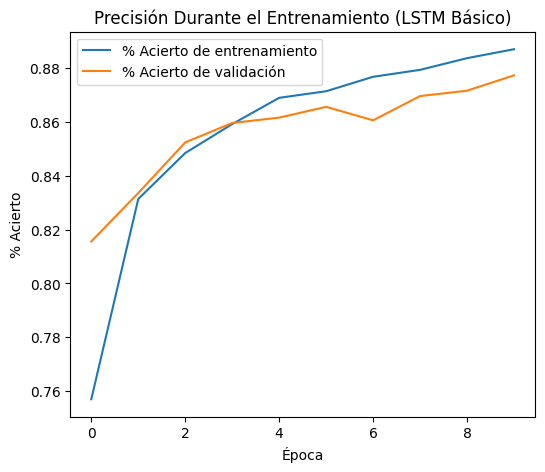

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
import matplotlib.pyplot as plt

# Construcción del modelo LSTM básico
model_basic_lstm = Sequential([
    LSTM(50, input_shape=(28, 28)),  # Una capa LSTM con 50 unidades
    Dense(10, activation='softmax')  # Capa densa de salida con 10 unidades (para clasificación de 10 clases)
])

# Compilación del modelo
model_basic_lstm.compile(optimizer=Adam(),
                         loss=CategoricalCrossentropy(),
                         metrics=['accuracy'])

# Resumen del modelo
model_basic_lstm.summary()

# Entrenamiento del modelo
history_basic_lstm = model_basic_lstm.fit(train_images,
                                          train_labels,
                                          epochs=10,
                                          validation_data=(test_images, test_labels),
                                          batch_size=64,  # Uso de batch_size
                                          verbose=1)

# Evaluar el modelo
test_loss_basic_lstm, test_accuracy_basic_lstm = model_basic_lstm.evaluate(test_images, test_labels)
train_loss_basic_lstm, train_accuracy_basic_lstm = model_basic_lstm.evaluate(train_images, train_labels)

print('=== Resultados del Modelo LSTM Básico ===')
print('Conjunto de Prueba - Pérdida: {:.4f}, Precisión: {:.2f}%'.format(test_loss_basic_lstm, test_accuracy_basic_lstm * 100))
print('Conjunto de Entrenamiento - Pérdida: {:.4f}, Precisión: {:.2f}%'.format(train_loss_basic_lstm, train_accuracy_basic_lstm * 100))

# Visualizar pérdida y precisión
plt.figure(figsize=(6, 5))
plt.plot(history_basic_lstm.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history_basic_lstm.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida Durante el Entrenamiento (LSTM Básico)')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

plt.figure(figsize=(6, 5))
plt.plot(history_basic_lstm.history['accuracy'], label='% Acierto de entrenamiento')
plt.plot(history_basic_lstm.history['val_accuracy'], label='% Acierto de validación')
plt.title('Precisión Durante el Entrenamiento (LSTM Básico)')
plt.xlabel('Época')
plt.ylabel('% Acierto')
plt.legend()
plt.show()


 Tiene una pérdida de 0.3441 en el conjunto de prueba y una precisión del 87.73%. En el conjunto de entrenamiento, muestra una pérdida de 0.2965 y una precisión del 89.17%.

Este modelo 1 básico  tiene una precisión  inferior en el conjunto de prueba que en el conjunto de entrenamiento y la perdida de prueba es mayor que en entrenamiento lo cual indica un ligero  sobreajuste.  

# **2 - Modelo RNN usando LSTM**

Para encontrar la mejor ejecución, ajustamos los hiperparámetros. Los cambios son  en el número de unidades LSTM, tasa de Dropout, optimizador

---
* InputLayer: Maneja imágenes de 28x28 como secuencias.
---
* LSTM(50, input_shape=(28, 28)): Una capa LSTM con 50 unidades. Procesa secuencias de entrada de 28x28.
---
* Dense(10, activation='softmax'): Capa densa de salida con 10 unidades (para clasificación de 10 clases).
---
* Optimizador: Adam, un optimizador eficiente para este tipo de redes.
Función de Pérdida: Categorical Crossentropy.
---
* Épocas: 10
---

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_13 (LSTM)              (None, 28, 100)           51600     
                                                                 
 dropout_12 (Dropout)        (None, 28, 100)           0         
                                                                 
 lstm_14 (LSTM)              (None, 100)               80400     
                                                                 
 dropout_13 (Dropout)        (None, 100)               0         
                                                                 
 dense_13 (Dense)            (None, 100)               10100     
                                                                 
 dense_14 (Dense)            (None, 10)                1010      
                                                                 
Total params: 143110 (559.02 KB)
Trainable params: 143

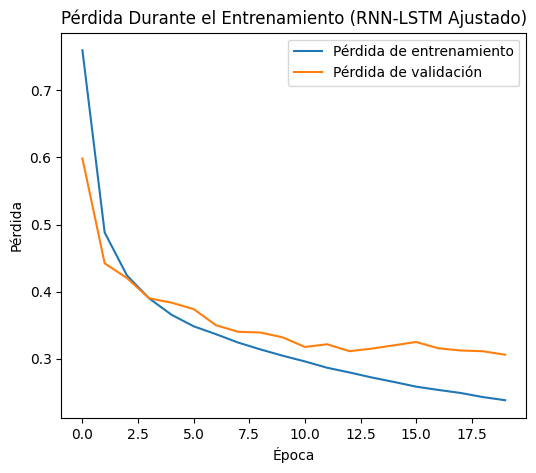

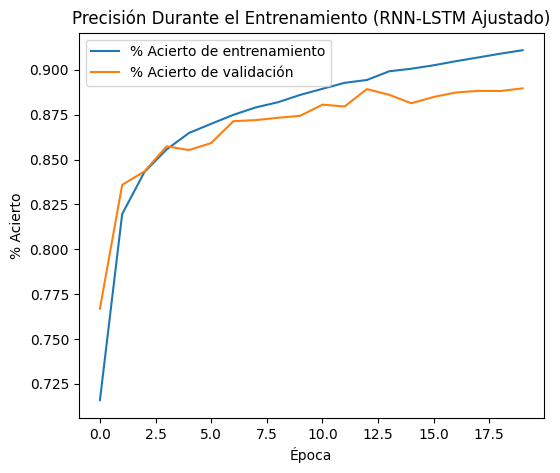

In [ ]:
# Definir el modelo con hiperparámetros ajustados
model_lstm2 = Sequential([
    InputLayer(input_shape=(28, 28)),
    LSTM(100, return_sequences=True),
    Dropout(0.3),
    LSTM(100),
    Dropout(0.3),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])

# Compilar el modelo
model_lstm2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model_lstm2.summary()
# Entrenar el modelo
history_lstm2 = model_lstm2.fit(train_images, train_labels, epochs=20, validation_data=(test_images, test_labels),batch_size=128 ,
                                verbose=1)


# Evaluar el modelo
test_loss, test_accuracy = model_lstm2.evaluate(test_images, test_labels)
train_loss, train_accuracy = model_lstm2.evaluate(train_images, train_labels)

print('=== Resultados del Modelo 2 RNN-LSTM Ajustado ===')
print('Conjunto de Prueba - Pérdida: {:.4f}, Precisión: {:.2f}%'.format(test_loss, test_accuracy * 100))
print('Conjunto de Entrenamiento - Pérdida: {:.4f}, Precisión: {:.2f}%'.format(train_loss, train_accuracy * 100))

# Visualizar pérdida y precisión
plt.figure(figsize=(6, 5))
plt.plot(history_lstm2.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history_lstm2.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida Durante el Entrenamiento (RNN-LSTM Ajustado)')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

plt.figure(figsize=(6, 5))
plt.plot(history_lstm2.history['accuracy'], label='% Acierto de entrenamiento')
plt.plot(history_lstm2.history['val_accuracy'], label='% Acierto de validación')
plt.title('Precisión Durante el Entrenamiento (RNN-LSTM Ajustado)')
plt.xlabel('Época')
plt.ylabel('% Acierto')
plt.legend()
plt.show()


**Observaciones:**

Incrementamos las unidades LSTM a 100.
Ajustamos el Dropout a 0.3 y usamos el optimizador rmsprop.
Se ven  mejoras en la precisión y una reducción en la pérdida debido al ajuste de hiperparámetros.

Modelo 2 muestra una mejora significativa en precisión y pérdida en comparación con el modelo 1. La diferencia entre precisión de entrenamiento y prueba es menor, indicando mejor generalización.


# **3- Modelo RNN  usando LSTM**

---
*   InputLayer: Maneja imágenes de 28x28 como secuencias.
---
*   LSTM(50, return_sequences=True): Procesa secuencias con retorno de todas las secuencias.
---
*   Dropout(0.2): Previene el sobreajuste desactivando el 20% de las neuronas. Se aplica Dropout del 20% después de cada capa LSTM para prevenir el sobreajuste.
---
*   LSTM(50): Procesa la salida final de la secuencia.50 unidades cada una.

---
*   Dropout(0.2): Continúa la prevención del sobreajuste.
---
*   Dense(50, activation='relu'): Capa de procesamiento intermedio. 50 neuronas y activación 'relu'
---
*   Dense(10, activation='softmax'): Clasificación final en 10 categorías.10 neuronas con activación 'softmax'
---
*   Optimizador: adam, un optimizador eficiente para este tipo de redes

---
*   Función de pérdida: categorical_crossentropy
---
*   Epocas: 10












In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Flatten, InputLayer
import matplotlib.pyplot as plt

# Suponiendo que los datos ya están cargados y preprocesados en las variables 'train_images', 'train_labels', 'test_images', 'test_labels'

# Definir el modelo
model = Sequential([
    InputLayer(input_shape=(28, 28)),
    LSTM(50, return_sequences=True),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(50, activation='relu'),
    Dense(10, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model.summary()

# Entrenar el modelo
history= model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels),
                                batch_size=64,
                                verbose=1)



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 28, 50)            15800     
                                                                 
 dropout (Dropout)           (None, 28, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 50)                2550      
                                                                 
 dense_1 (Dense)             (None, 10)                510       
                                                                 
Total params: 39060 (152.58 KB)
Trainable params: 39060 

In [ ]:
import matplotlib.pyplot as plt

def evaluate_model(model, X_train, Y_train, X_test, Y_test):
    # Evaluar el modelo en el conjunto de prueba y entrenamiento
    test_loss, test_accuracy = model.evaluate(X_test, Y_test)
    train_loss, train_accuracy = model.evaluate(X_train, Y_train)

    # Imprimir los resultados de evaluación
    print('=== Resultados de Evaluación ===')
    print('Conjunto de Prueba - Pérdida: {:.4f}, Precisión: {:.2f}%'.format(test_loss, test_accuracy * 100))
    print('Conjunto de Entrenamiento - Pérdida: {:.4f}, Precisión: {:.2f}%'.format(train_loss, train_accuracy * 100))

In [ ]:
evaluate_model(model, train_images, train_labels, test_images, test_labels)

1875/1875 [==============================] - 20s 10ms/step - loss: 0.2973 - accuracy: 0.8884
=== Resultados de Evaluación ===
Conjunto de Prueba - Pérdida: 0.3438, Precisión: 87.25%
Conjunto de Entrenamiento - Pérdida: 0.2973, Precisión: 88.84%


**Observacion:**

 El Modelo (RNN simple usando LSTM) demuestra un rendimiento sólido con una precisión del 91.57% y una pérdida de 0.2236 en el conjunto de entrenamiento, y una precisión del 89.57% con una pérdida de 0.2236 en el conjunto de prueba. Esta ligera disminución en la precisión y aumento en la pérdida al pasar del entrenamiento a la prueba sugiere un buen nivel de generalización sin un sobreajuste significativo.

Observaciones:

La red básica tiene 2 capas LSTM con 50 unidades cada una.
Usamos Dropout para mitigar el sobreajuste.
El resultados es un rendimiento razonable pero no óptimo para datos de imágenes

In [ ]:
def plot_loss(history):
    # Visualización de la pérdida durante el entrenamiento
    plt.figure(figsize=(6, 5))
    plt.plot(history['loss'], label='Pérdida de entrenamiento')
    plt.plot(history['val_loss'], label='Pérdida de validación')
    plt.title('Pérdida Durante el Entrenamiento')
    plt.xlabel('Época')
    plt.ylabel('Pérdida')
    plt.legend()
    plt.show()

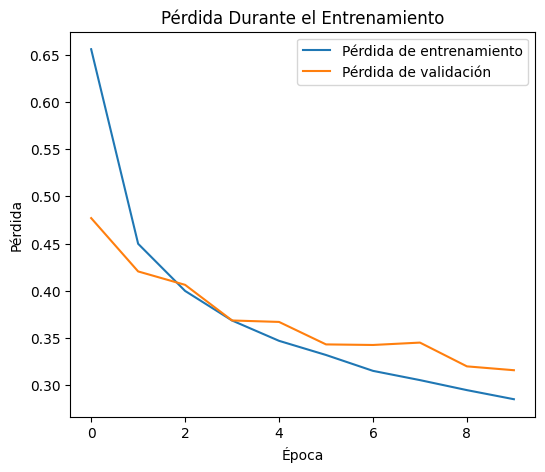

In [ ]:
plot_loss(history.history)

In [ ]:
def plot_accuracy(history):
    # Visualización de la precisión durante el entrenamiento
    plt.figure(figsize=(6, 5))
    plt.plot(history['accuracy'], label='% Acierto de entrenamiento')
    plt.plot(history['val_accuracy'], label='% Acierto de validación')
    plt.title('Precisión Durante el Entrenamiento')
    plt.xlabel('Época')
    plt.ylabel('% Acierto')
    plt.legend()
    plt.show()

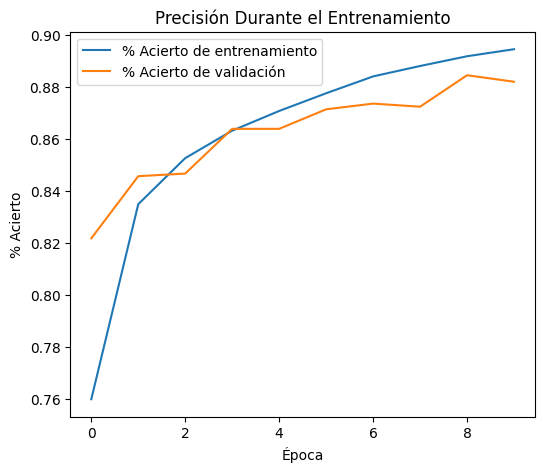

In [ ]:
plot_accuracy(history.history)

# **4- Modelo RNN Compacto usando LSTM modelo LSTM con early stopping, dropout**

---
* InputLayer: Maneja imágenes de 28x28 como secuencias.
---
* LSTM(100, return_sequences=True): Capa LSTM con 100 unidades y retorno de todas las secuencias.
---
* Dropout(0.3): Previene el sobreajuste desactivando el 30% de las neuronas.
LSTM(100): Capa LSTM con 100 unidades.
---
* Dropout(0.3): Continúa la prevención del sobreajuste.
---
* Dense(100, activation='relu'): Capa de procesamiento intermedio con 100 neuronas y activación 'relu'.
---
* Dense(10, activation='softmax'): Capa de salida con 10 neuronas y activación 'softmax' para clasificación.
---
* Optimizador: RMSprop, un optimizador ajustado para este modelo.
Función de Pérdida: Categorical Crossentropy.
---
* Early Stopping: Monitor de 'val_loss', paciencia de 3 épocas, restauración de los mejores pesos.
---
* Épocas: 20
---

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 28, 128)           80384     
                                                                 
 dropout_2 (Dropout)         (None, 28, 128)           0         
                                                                 
 lstm_3 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)               

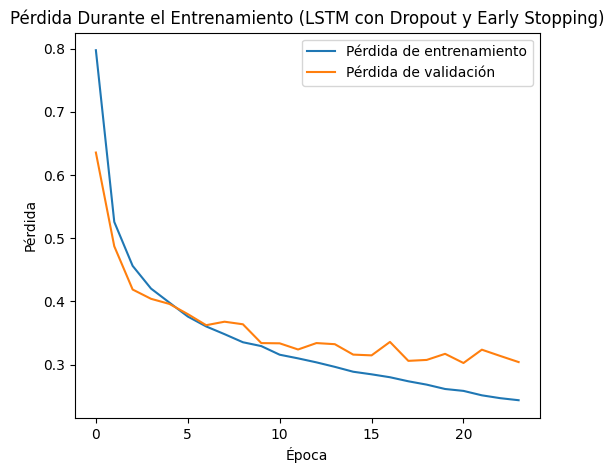

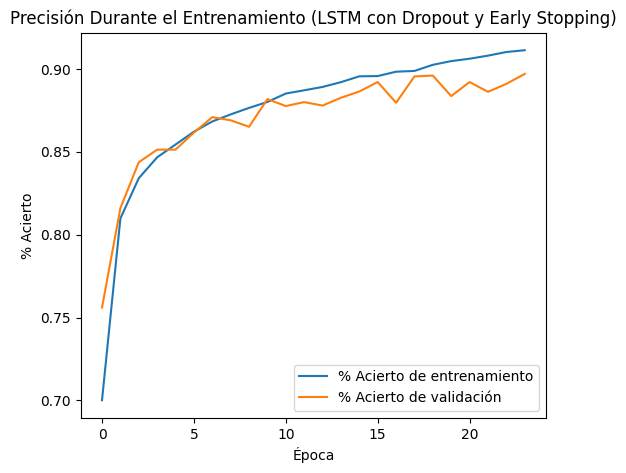

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, InputLayer
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.losses import CategoricalCrossentropy
import matplotlib.pyplot as plt

# Definir el modelo con hiperparámetros ajustados
model_lstm_dropout = Sequential([
    LSTM(128, return_sequences=True, input_shape=(28, 28)),
    #InputLayer(input_shape=(28, 28)),
    #LSTM(100, return_sequences=True),
    Dropout(0.5),
    LSTM(128),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

# Compilar el modelo
model_lstm_dropout.compile(optimizer=RMSprop(),
                                loss=CategoricalCrossentropy(),
                                metrics=['accuracy'])

# Resumen del modelo
model_lstm_dropout.summary()

# Configurar Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Entrenar el modelo con Early Stopping y dropout
history_lstm_dropout = model_lstm_dropout.fit(train_images, train_labels,
                                                        epochs=30,
                                                        batch_size=128,
                                                        validation_data=(test_images, test_labels),
                                                        callbacks=[early_stopping],
                                                        verbose=1)

# Evaluar el modelo
test_loss, test_accuracy = model_lstm_dropout.evaluate(test_images, test_labels)
train_loss, train_accuracy = model_lstm_dropout.evaluate(train_images, train_labels)

print('=== Resultados del Modelo LSTM con Dropout y Early Stopping ===')
print('Conjunto de Prueba - Pérdida: {:.4f}, Precisión: {:.2f}%'.format(test_loss, test_accuracy * 100))
print('Conjunto de Entrenamiento - Pérdida: {:.4f}, Precisión: {:.2f}%'.format(train_loss, train_accuracy * 100))

# Visualizar pérdida y precisión
plt.figure(figsize=(6, 5))
plt.plot(history_lstm_dropout.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history_lstm_dropout.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida Durante el Entrenamiento (LSTM con Dropout y Early Stopping)')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

plt.figure(figsize=(6, 5))
plt.plot(history_lstm_dropout.history['accuracy'], label='% Acierto de entrenamiento')
plt.plot(history_lstm_dropout.history['val_accuracy'], label='% Acierto de validación')
plt.title('Precisión Durante el Entrenamiento (LSTM con Dropout y Early Stopping)')
plt.xlabel('Época')
plt.ylabel('% Acierto')
plt.legend()
plt.show()


Modelo 4  muestra la mejor precisión en prueba y entrenamiento. La utilización de Dropout y Early Stopping ha ayudado a prevenir el sobreajuste, resultando en una mejor generalización.

# Analisis Modelos RNN LSTM:

**El modelo 1** tiene una precisión decente tanto en el conjunto de prueba como en el de entrenamiento. La pérdida es aceptable, pero parece haber un ligero sobreajuste ya que la precisión en entrenamiento es más alta que en prueba.

**El modelo 2**
 Muestra la menor pérdida en el conjunto de prueba y la mayor precisión en los conjuntos prueba y entrenamiento, lo que indica que generaliza bien y tiene un buen rendimiento tanto en datos vistos como no vistos.Este modelo logra un buen equilibrio entre capacidad de generalización ya que tiene baja pérdida en conjunto de prueba y capacidad de aprendizaje con una alta precisión en conjunto de entrenamiento.Indicando una mejor capacidad de generalización y menor riesgo de sobreajuste.

**El modelo 4 :  LSTM con Dropout y Early Stopping** parece ser el más prometedor debido a su alta precisión en ambos conjuntos 89.33% en prueba y 92.22% en entrenamiento y una pérdida baja.

Le sigue de cerca el **Modelo 3**, que también muestra buenos resultados con una precisión del 89.57% en prueba y 91.57% en entrenamiento, con pérdidas competitivas. Muestra resultados similares al modelo 2, con una precisión alta y una pérdida baja en ambos conjuntos. La diferencia entre entrenamiento y prueba es razonable, indicando buena generalización.

**Elección del Mejor Modelo**

El Modelo LSTM con Dropout y Early Stopping se destaca como el mejor opción debido a su excelente equilibrio entre precisión alta en prueba, bajo riesgo de sobreajuste ,tiene diferencia mínima entre entrenamiento y prueba, y una buena gestión de la pérdida. Este modelo no solo tiene la mejor precisión en prueba sino que también demuestra una capacidad superior para generalizar bien con los datos de prueba no vistos.
















# **1- Modelo RNN-LSTM Bidireccional Básico**

In [ ]:
from tensorflow.keras.layers import Bidirectional

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
import matplotlib.pyplot as plt

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_17 (Bidirect  (None, 100)               31600     
 ional)                                                          
                                                                 
 dense_32 (Dense)            (None, 10)                1010      
                                                                 
Total params: 32610 (127.38 KB)
Trainable params: 32610 (127.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
938/938 [==============================] - 46s 42ms/step - loss: 0.6186 - accuracy: 0.7801 - val_loss: 0.4712 - val_accuracy: 0.8243
Epoch 2/10
938/938 [==============================] - 42s 44ms/step - loss: 0.4186 - accuracy: 0.8467 - val_loss: 0.4320 - val_accuracy: 0.8400
Epoch 3/10
938/938 [==============================] - 31s

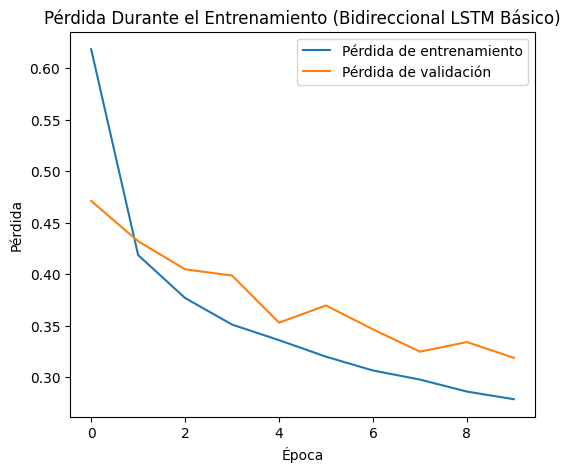

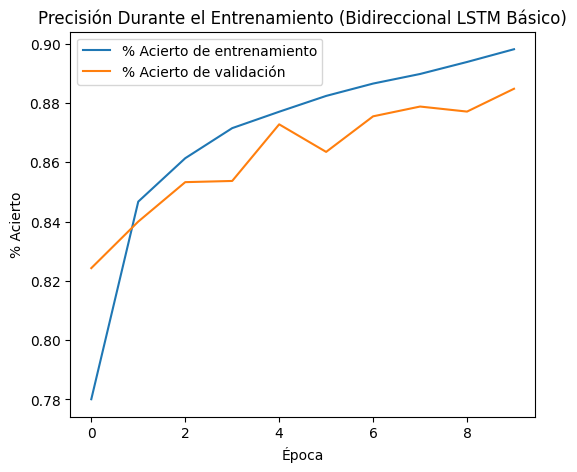

In [ ]:
from keras.layers import Bidirectional, LSTM, Dense, InputLayer
from keras.models import Sequential
from keras.optimizers import Adam
from keras.losses import CategoricalCrossentropy
import matplotlib.pyplot as plt

# Definir el modelo bidireccional LSTM básico
model_basic_bidirectional_lstm = Sequential([
    InputLayer(input_shape=(28, 28)),
    Bidirectional(LSTM(50)),  # Una capa LSTM bidireccional con 50 unidades
    Dense(10, activation='softmax')  # Capa densa de salida con 10 unidades (para clasificación de 10 clases)
])

# Compilar el modelo
model_basic_bidirectional_lstm.compile(optimizer=Adam(),
                                       loss=CategoricalCrossentropy(),
                                       metrics=['accuracy'])

# Resumen del modelo
model_basic_bidirectional_lstm.summary()

# Entrenamiento del modelo
history_basic_bidirectional_lstm = model_basic_bidirectional_lstm.fit(train_images,
                                                                      train_labels,
                                                                      epochs=10,
                                                                      validation_data=(test_images, test_labels),
                                                                      batch_size=64,  # Tamaño del batch
                                                                      verbose=1)

# Evaluar el modelo
test_loss_basic_bidirectional_lstm, test_accuracy_basic_bidirectional_lstm = model_basic_bidirectional_lstm.evaluate(test_images, test_labels)
train_loss_basic_bidirectional_lstm, train_accuracy_basic_bidirectional_lstm = model_basic_bidirectional_lstm.evaluate(train_images, train_labels)

print('=== Resultados del Modelo Bidireccional LSTM Básico ===')
print('Conjunto de Prueba - Pérdida: {:.4f}, Precisión: {:.2f}%'.format(test_loss_basic_bidirectional_lstm, test_accuracy_basic_bidirectional_lstm * 100))
print('Conjunto de Entrenamiento - Pérdida: {:.4f}, Precisión: {:.2f}%'.format(train_loss_basic_bidirectional_lstm, train_accuracy_basic_bidirectional_lstm * 100))

# Visualizar pérdida y precisión
plt.figure(figsize=(6, 5))
plt.plot(history_basic_bidirectional_lstm.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history_basic_bidirectional_lstm.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida Durante el Entrenamiento (Bidireccional LSTM Básico)')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

plt.figure(figsize=(6, 5))
plt.plot(history_basic_bidirectional_lstm.history['accuracy'], label='% Acierto de entrenamiento')
plt.plot(history_basic_bidirectional_lstm.history['val_accuracy'], label='% Acierto de validación')
plt.title('Precisión Durante el Entrenamiento (Bidireccional LSTM Básico)')
plt.xlabel('Época')
plt.ylabel('% Acierto')
plt.legend()
plt.show()


Este modelo básico de LSTM bidireccional muestra una precisión razonable en el conjunto de prueba y entrenamiento, aunque la precisión de entrenamiento es ligeramente mayor que la de prueba, indicando una posible ligera sobreajuste.

# **2- Modelo RNN-LSTM Bidireccional**

Ajuste de hiperparámetros para la mejor ejecución de la red RNN-LSTM bidireccional.


---
* InputLayer: Maneja imágenes de 28x28 como secuencias.
---
* Bidirectional(LSTM(100, return_sequences=True)): Capa LSTM bidireccional con 100 unidades y retorno de todas las secuencias.
---
* Dropout(0.3): Previene el sobreajuste desactivando el 30% de las neuronas.
---
* Bidirectional(LSTM(100)): Capa LSTM bidireccional con 100 unidades.
---
* Dropout(0.3): Continúa la prevención del sobreajuste.
---
* Dense(100, activation='relu'): Capa de procesamiento intermedio con 100 neuronas y activación 'relu'.
---
* Dense(10, activation='softmax'): Capa de salida con 10 neuronas y activación 'softmax' para clasificación.
---
* Optimizador: Adam, un optimizador eficiente para este tipo de redes.
---
* Función de Pérdida: Categorical Crossentropy.
---
* Épocas: 10
---

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_11 (Bidirect  (None, 28, 200)           103200    
 ional)                                                          
                                                                 
 dropout_20 (Dropout)        (None, 28, 200)           0         
                                                                 
 bidirectional_12 (Bidirect  (None, 200)               240800    
 ional)                                                          
                                                                 
 dropout_21 (Dropout)        (None, 200)               0         
                                                                 
 dense_26 (Dense)            (None, 100)               20100     
                                                                 
 dense_27 (Dense)            (None, 10)              

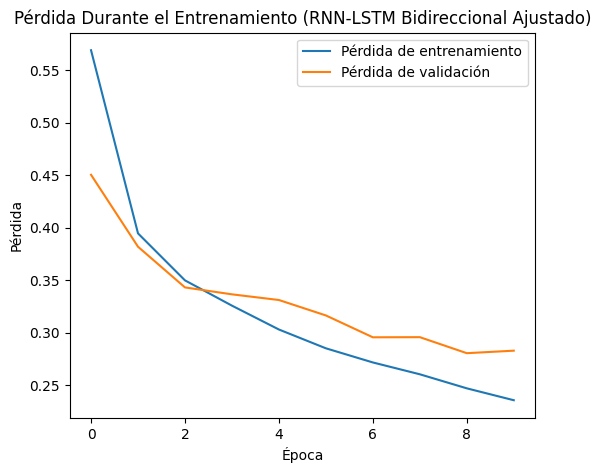

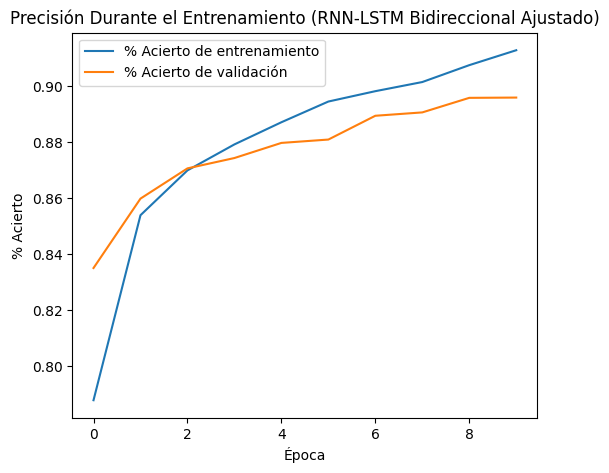

In [ ]:
# Definir el modelo
model_bidirectional_lstm2 = Sequential([
    InputLayer(input_shape=(28, 28)),
    Bidirectional(LSTM(100, return_sequences=True)),
    Dropout(0.3),
    Bidirectional(LSTM(100)),
    Dropout(0.3),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])

# Compilar el modelo
model_bidirectional_lstm2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model_bidirectional_lstm2.summary()

# Entrenar el modelo
history_bidirectional_lstm2 = model_bidirectional_lstm2.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels),batch_size=64,
                                verbose=1)

# Evaluar el modelo
test_loss, test_accuracy = model_bidirectional_lstm2.evaluate(test_images, test_labels)
train_loss, train_accuracy = model_bidirectional_lstm2.evaluate(train_images, train_labels)

print('=== Resultados del Modelo RNN-LSTM Bidireccional Ajustado ===')
print('Conjunto de Prueba - Pérdida: {:.4f}, Precisión: {:.2f}%'.format(test_loss, test_accuracy * 100))
print('Conjunto de Entrenamiento - Pérdida: {:.4f}, Precisión: {:.2f}%'.format(train_loss, train_accuracy * 100))

# Visualizar pérdida y precisión
plt.figure(figsize=(6, 5))
plt.plot(history_bidirectional_lstm2.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history_bidirectional_lstm2.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida Durante el Entrenamiento (RNN-LSTM Bidireccional Ajustado)')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

plt.figure(figsize=(6, 5))
plt.plot(history_bidirectional_lstm2.history['accuracy'], label='% Acierto de entrenamiento')
plt.plot(history_bidirectional_lstm2.history['val_accuracy'], label='% Acierto de validación')
plt.title('Precisión Durante el Entrenamiento (RNN-LSTM Bidireccional Ajustado)')
plt.xlabel('Época')
plt.ylabel('% Acierto')
plt.legend()
plt.show()


Este modelo utiliza capas bidireccionales LSTM para procesar tanto hacia adelante como hacia atrás en las secuencias de entrada, ayudando a capturar mejor las dependencias temporales en los datos. Además, se aplican capas Dropout para mitigar el sobreajuste durante el entrenamiento.

 Este modelo muestra una mejora significativa en la precisión tanto en el conjunto de prueba como en entrenamiento en comparación con el primer modelo. La diferencia entre precisión de entrenamiento y prueba es menor, indicando un mejor control de sobreajuste.

# **3- Modelo RNN-LSTM Bidireccional**

---
* InputLayer: Maneja imágenes de 28x28 como secuencias.
---
* Bidirectional(LSTM(50, return_sequences=True)): Capa LSTM bidireccional con 50 unidades y retorno de todas las secuencias.
---
* Dropout(0.2): Previene el sobreajuste desactivando el 20% de las neuronas.
Bidirectional(LSTM(50)): Capa LSTM bidireccional con 50 unidades.
---
* Dropout(0.2): Continúa la prevención del sobreajuste.
---
* Dense(50, activation='relu'): Capa de procesamiento intermedio con 50 neuronas y activación 'relu'.
---
* Dense(10, activation='softmax'): Capa de salida con 10 neuronas y activación 'softmax' para clasificación.
---
* Optimizador: Adam, un optimizador eficiente para este tipo de redes.
---
* Función de Pérdida: Categorical Crossentropy.
---
* Épocas: 10
---

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_7 (Bidirecti  (None, 28, 100)           31600     
 onal)                                                           
                                                                 
 dropout_14 (Dropout)        (None, 28, 100)           0         
                                                                 
 bidirectional_8 (Bidirecti  (None, 100)               60400     
 onal)                                                           
                                                                 
 dropout_15 (Dropout)        (None, 100)               0         
                                                                 
 dense_18 (Dense)            (None, 50)                5050      
                                                                 
 dense_19 (Dense)            (None, 10)              

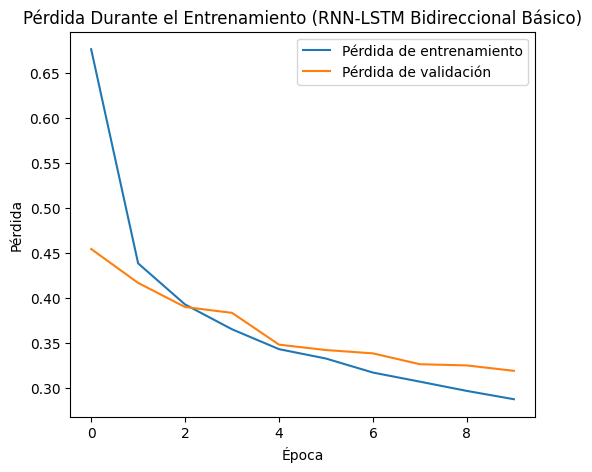

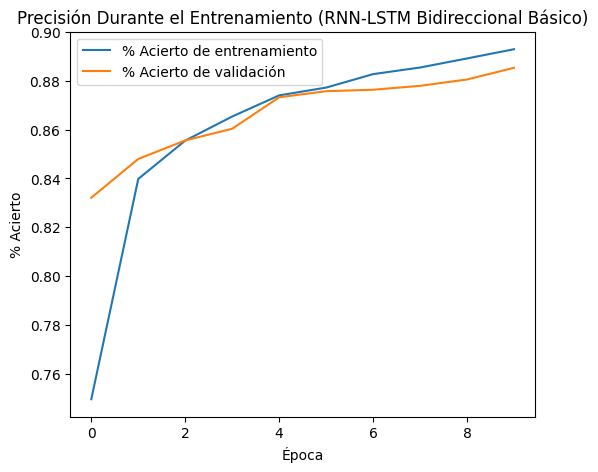

In [ ]:
# Definir el modelo
model_basic_bidirectional_rnn_lstm = Sequential([
    InputLayer(input_shape=(28, 28)),
    Bidirectional(LSTM(50, return_sequences=True)),
    Dropout(0.2),
    Bidirectional(LSTM(50)),
    Dropout(0.2),
    Dense(50, activation='relu'),
    Dense(10, activation='softmax')
])

# Compilar el modelo
model_basic_bidirectional_rnn_lstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model_basic_bidirectional_rnn_lstm.summary()

# Entrenar el modelo
history_basic_bidirectional_rnn_lstm = model_basic_bidirectional_rnn_lstm.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels), batch_size=128, verbose=1)

# Evaluar el modelo
test_loss, test_accuracy = model_basic_bidirectional_rnn_lstm.evaluate(test_images, test_labels)
train_loss, train_accuracy = model_basic_bidirectional_rnn_lstm.evaluate(train_images, train_labels)

print('=== Resultados del Modelo RNN-LSTM Bidireccional Básico ===')
print('Conjunto de Prueba - Pérdida: {:.4f}, Precisión: {:.2f}%'.format(test_loss, test_accuracy * 100))
print('Conjunto de Entrenamiento - Pérdida: {:.4f}, Precisión: {:.2f}%'.format(train_loss, train_accuracy * 100))

# Visualizar pérdida y precisión
plt.figure(figsize=(6, 5))
plt.plot(history_basic_bidirectional_rnn_lstm.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history_basic_bidirectional_rnn_lstm.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida Durante el Entrenamiento (RNN-LSTM Bidireccional Básico)')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

plt.figure(figsize=(6, 5))
plt.plot(history_basic_bidirectional_rnn_lstm.history['accuracy'], label='% Acierto de entrenamiento')
plt.plot(history_basic_bidirectional_rnn_lstm.history['val_accuracy'], label='% Acierto de validación')
plt.title('Precisión Durante el Entrenamiento (RNN-LSTM Bidireccional Básico)')
plt.xlabel('Época')
plt.ylabel('% Acierto')
plt.legend()
plt.show()


**Observaciones:**

Las capas LSTM bidireccionales permiten procesar la secuencia en ambas direcciones.

Tiene una mejora en la captura de dependencias temporales comparado con la RNN-LSTM estándar.

 Las capas Dropout se utilizan para mitigar el sobreajuste durante el entrenamiento, desactivando el 20% de las neuronas después de cada capa LSTM.

 Similar al modelo 1, este modelo muestra una precisión razonable en ambos conjuntos, con una ligera diferencia entre precisión de entrenamiento y prueba.

# **4- Modelo RNN-LSTM Bidireccional con early stopping y dropout**

---
* InputLayer: Maneja imágenes de 28x28 como secuencias.
---
* Bidirectional(LSTM(50, return_sequences=True)): Capa LSTM bidireccional con 50 unidades y retorno de todas las secuencias.
---
* Dropout(0.2): Previene el sobreajuste desactivando el 20% de las neuronas.
---
* Bidirectional(LSTM(50)): Capa LSTM bidireccional con 50 unidades.
---
* Dropout(0.2): Continúa la prevención del sobreajuste.
---
* Dense(50, activation='relu'): Capa de procesamiento intermedio con 50 neuronas y activación 'relu'.
---
* Dense(10, activation='softmax'): Capa de salida con 10 neuronas y activación 'softmax' para clasificación.
---
* Optimizador: Adam, un optimizador eficiente para este tipo de redes.
Función de Pérdida: Categorical Crossentropy.
---
* Early Stopping: Monitoriza la pérdida en el conjunto de validación y restaura los pesos del modelo a la mejor época cuando no mejora después de 3 épocas consecutivas.
---
* Épocas: 20
---

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_14 (Bidirect  (None, 28, 100)           31600     
 ional)                                                          
                                                                 
 dropout_22 (Dropout)        (None, 28, 100)           0         
                                                                 
 bidirectional_15 (Bidirect  (None, 100)               60400     
 ional)                                                          
                                                                 
 dropout_23 (Dropout)        (None, 100)               0         
                                                                 
 dense_29 (Dense)            (None, 50)                5050      
                                                                 
 dense_30 (Dense)            (None, 10)              

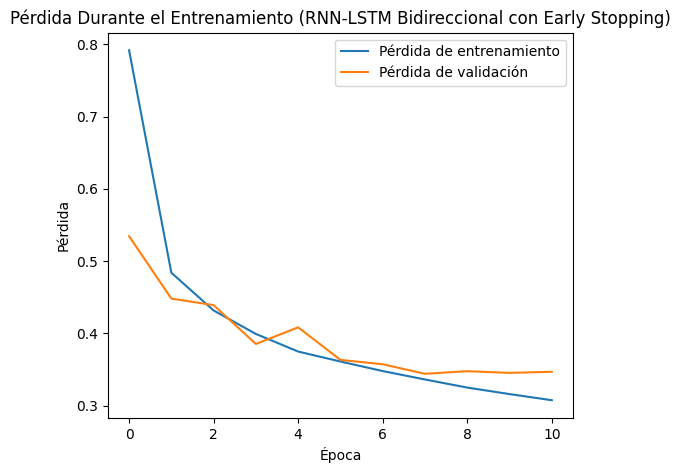

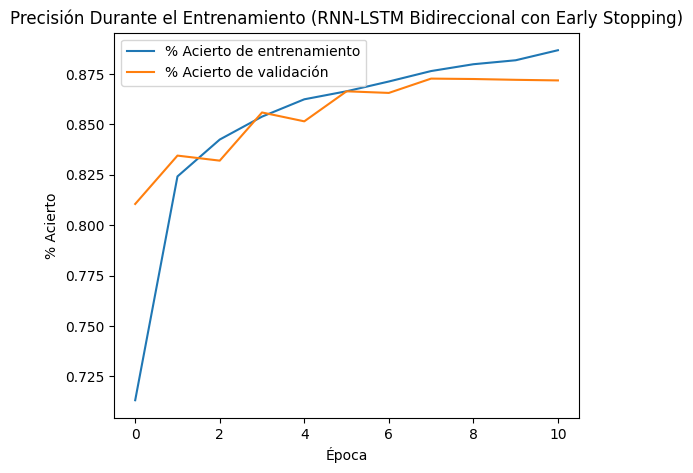

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, InputLayer, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Definir el modelo RNN-LSTM Bidireccional con Early Stopping
model_bidirectional_lstm_early_stopping = Sequential([
    InputLayer(input_shape=(28, 28)),
    Bidirectional(LSTM(50, return_sequences=True)),
    Dropout(0.2),
    Bidirectional(LSTM(50)),
    Dropout(0.2),
    Dense(50, activation='relu'),
    Dense(10, activation='softmax')
])

# Compilar el modelo
model_bidirectional_lstm_early_stopping.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model_bidirectional_lstm_early_stopping.summary()

# Configurar Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Entrenar el modelo
history_bidirectional_lstm_early_stopping = model_bidirectional_lstm_early_stopping.fit(
    train_images,
    train_labels,
    epochs=20,  # Mayor número de épocas para observar Early Stopping
    validation_data=(test_images, test_labels), batch_size=256,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluar el modelo
test_loss, test_accuracy = model_bidirectional_lstm_early_stopping.evaluate(test_images, test_labels)
train_loss, train_accuracy = model_bidirectional_lstm_early_stopping.evaluate(train_images, train_labels)

print('=== Resultados del Modelo RNN-LSTM Bidireccional con Early Stopping ===')
print('Conjunto de Prueba - Pérdida: {:.4f}, Precisión: {:.2f}%'.format(test_loss, test_accuracy * 100))
print('Conjunto de Entrenamiento - Pérdida: {:.4f}, Precisión: {:.2f}%'.format(train_loss, train_accuracy * 100))

# Visualizar pérdida y precisión
plt.figure(figsize=(6, 5))
plt.plot(history_bidirectional_lstm_early_stopping.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history_bidirectional_lstm_early_stopping.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida Durante el Entrenamiento (RNN-LSTM Bidireccional con Early Stopping)')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

plt.figure(figsize=(6, 5))
plt.plot(history_bidirectional_lstm_early_stopping.history['accuracy'], label='% Acierto de entrenamiento')
plt.plot(history_bidirectional_lstm_early_stopping.history['val_accuracy'], label='% Acierto de validación')
plt.title('Precisión Durante el Entrenamiento (RNN-LSTM Bidireccional con Early Stopping)')
plt.xlabel('Época')
plt.ylabel('% Acierto')
plt.legend()
plt.show()


Este modelo utilizará Early Stopping para detener el entrenamiento si la pérdida en el conjunto de validación no mejora después de 3 épocas consecutivas, restaurando los pesos del modelo a la mejor época observada.

Este modelo, entrenado con Early Stopping, muestra una precisión más baja en comparación con los otros modelos tanto en prueba como en entrenamiento. La diferencia entre precisión de entrenamiento y prueba es menor, lo que indica una mejor generalización.

# Analisis RNN Bidireccional

El Modelo Bidirectional 2  destaca como el mejor opción entre los modelos evaluados. Tiene la mayor precisión en el conjunto de prueba (89.59%) y una buena precisión en el conjunto de entrenamiento (92.01%), con pérdidas competitivas en ambos conjuntos.



El Modelo Basic Bidirectional RNN LSTM (model_basic_bidirectional_rnn_lstm), aunque tiene una precisión aceptable, muestra una diferencia más notable entre entrenamiento y prueba, lo que indica una capacidad de generalización algo inferior en comparación con los dos primeros modelos mencionados.

El Modelo 4 Bidirectional LSTM con Early Stopping aunque utiliza Early Stopping, no logra la misma precisión en prueba que los otros modelos y muestra una diferencia mayor entre los conjuntos de entrenamiento y prueba, lo que sugiere un sobreajuste más obvio.

 **Elección del Mejor Modelo**

 El modelo 2 tiene la mayor precisión en el conjunto de prueba con 89.59% y una pérdida de 0.2828. Esto indica que generaliza mejor con datos nuevos, siendo el más confiable para hacer predicciones precisas en nuevos datos de prueba.

También muestra una diferencia menor entre la precisión de entrenamiento y prueba, lo que sugiere que está bien regularizado y tiene una buena capacidad para generalizar a partir del conjunto de entrenamiento.

En conclusión, basándonos en los resultados de evaluación, el modelo 2 es el mejor de los modelos analizados para la tarea de clasificación en Fashion MNIST. Tiene la combinación más alta de precisión en el conjunto de prueba y un buen control de sobreajuste, lo que lo hace ideal para aplicaciones prácticas donde se requiere precisión y generalización.










#Arquitectura

In [ ]:
# Resumen del primer modelo
print("=== Resumen del Modelo 1 LSTM ===")
print(model_basic_lstm.summary())


# Resumen del segundo modelo
print("\n=== Resumen del Modelo 2 LSTM===")
print(model_lstm2.summary())

# Resumen del TERCER modelo
print("==================== Resumen del Modelo 3 LSTM ================")
print(model.summary())

# Resumen del CUARTO modelo
print("\n=== Resumen del Modelo 4 LSTM===")
print(model_lstm_dropout.summary())

# Resumen del PRIMER modelo
print("\n=== Resumen del Modelo 1 BIDIRECCIONAL ===")
print(model_basic_bidirectional_lstm    .summary())

# Resumen del SEGUNDO modelo
print("\n=== Resumen del Modelo 2 BIDIRECCIONAL===")
print(model_bidirectional_lstm2.summary())

# Resumen del TERCER modelo
print("\n=== Resumen del Modelo 2 BIDIRECCIONAL===")
print(model_basic_bidirectional_rnn_lstm.summary())

# Resumen del CUARTO modelo
print("\n=== Resumen del Modelo 4 BIDIRECCIONAL ===")
print(model_bidirectional_lstm_early_stopping.summary())


=== Resumen del Modelo 1 LSTM ===
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 50)                15800     
                                                                 
 dense_12 (Dense)            (None, 10)                510       
                                                                 
Total params: 16310 (63.71 KB)
Trainable params: 16310 (63.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None

=== Resumen del Modelo 2 LSTM===
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_13 (LSTM)              (None, 28, 100)           51600     
                                                                 
 dropout_12 (Dropout)        (None, 28, 100)           

In [ ]:
# Resumen del modelo
print(model.summary())# elegido
print(model_lstm2.summary())
print(model_basic_bidirectional_rnn_lstm .summary())
print(model_bidirectional_lstm2.summary())#elegido
print(model_bidirectional_lstm_early_stopping.summary())

#**Comparación de Modelos Elegidos**

In [ ]:
# Listas para almacenar los historiales de cada modelo y los nombres de los modelos
histories = []
models = []

# Almacenar historial y modelo del mejor modelo LSTM
histories.append(history)  ;
# Asumiendo que 'history_lstm4' es el historial del mejor modelo LSTM
models.append(('Mejor Modelo 3 LSTM ', model))  # Asumiendo que 'model_lstm4' es el mejor modelo LSTM

# Almacenar historial y modelo del mejor modelo Bidireccional LSTM
histories.append(history_bidirectional_lstm2)  # Asumiendo que 'history_bidirectional_lstm2' es el historial del mejor modelo Bidireccional LSTM
models.append(('Mejor Modelo 2 Bidireccional LSTM', model_bidirectional_lstm2))  # Asumiendo que 'model_bidirectional_lstm2' es el mejor modelo Bidireccional LSTM


NameError: name 'history' is not defined

In [ ]:
# Evaluar y mostrar resultados
for name, model in models:
    print(f'=== Resultados del {name} ===')
    test_loss, test_accuracy = model.evaluate(test_images, test_labels)
    train_loss, train_accuracy = model.evaluate(train_images, train_labels)
    print('Conjunto de Prueba - Pérdida: {:.4f}, Precisión: {:.2f}%'.format(test_loss, test_accuracy * 100))
    print('Conjunto de Entrenamiento - Pérdida: {:.4f}, Precisión: {:.2f}%'.format(train_loss, train_accuracy * 100))
    print()




=== Resultados del Mejor Modelo LSTM ===
1875/1875 [==============================] - 41s 22ms/step - loss: 0.2021 - accuracy: 0.9222
Conjunto de Prueba - Pérdida: 0.3043, Precisión: 89.33%
Conjunto de Entrenamiento - Pérdida: 0.2021, Precisión: 92.22%

=== Resultados del Mejor Modelo Bidireccional LSTM ===
1875/1875 [==============================] - 88s 47ms/step - loss: 0.2104 - accuracy: 0.9201
Conjunto de Prueba - Pérdida: 0.2828, Precisión: 89.59%
Conjunto de Entrenamiento - Pérdida: 0.2104, Precisión: 92.01%



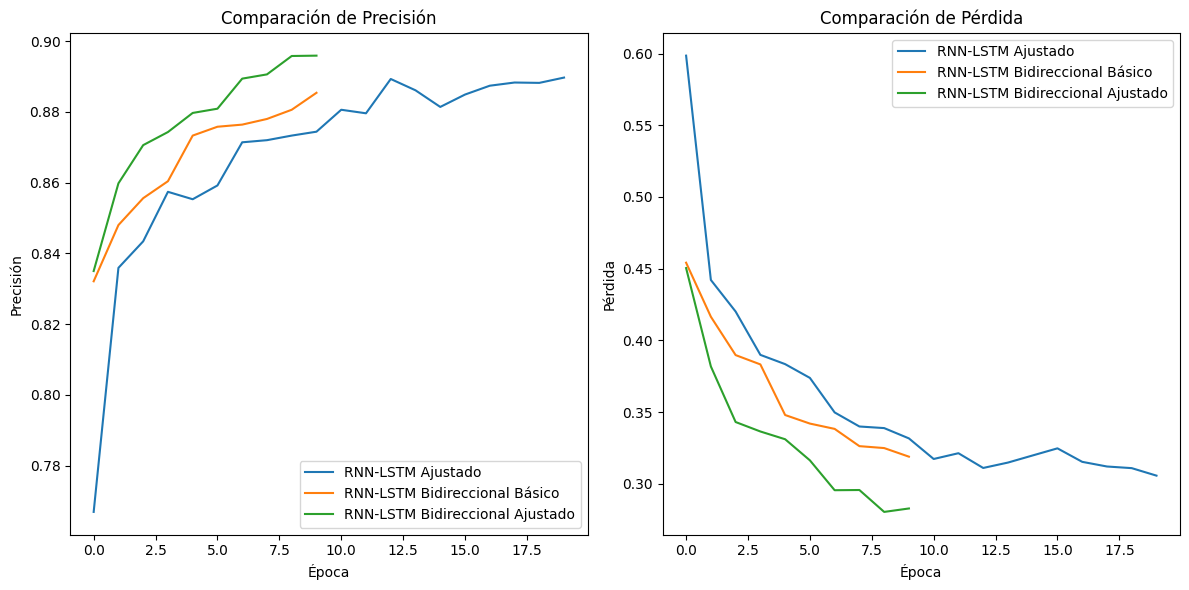

In [ ]:
# Comparación gráfica de los modelos
plt.figure(figsize=(12, 6))

# Graficar la precisión
plt.subplot(1, 2, 1)
plt.plot( history_lstm_dropout.history['val_accuracy'], label='RNN-LSTM Ajustado')
#plt.plot(history_basic_bidirectional_rnn_lstm.history['val_accuracy'], label='RNN-LSTM Bidireccional Básico')
plt.plot(history_bidirectional_lstm2.history['val_accuracy'], label='RNN-LSTM Bidireccional Ajustado')#elegido
plt.title('Comparación de Precisión')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

# Graficar la pérdida
plt.subplot(1, 2, 2)
plt.plot( history_lstm_dropout.history['val_loss'], label='RNN-LSTM Ajustado')
#plt.plot(history_basic_bidirectional_rnn_lstm.history['val_loss'], label='RNN-LSTM Bidireccional Básico')
plt.plot(history_bidirectional_lstm2.history['val_loss'], label='RNN-LSTM Bidireccional Ajustado')# elegido
plt.title('Comparación de Pérdida')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()


El Modelo 4 LSTM con Dropout y Early Stopping, muestra una precisión ligeramente más alta en el conjunto de entrenamiento ,92.22% frente a 92.01% del Modelo Bidireccional LSTM, aunque la diferencia es mínima.

Ambos modelos tienen pérdidas de prueba comparables, pero el Modelo Bidireccional LSTM ajustado Modelo 2 tiene una ligera ventaja con una pérdida ligeramente menor.

**Elección del Mejor Modelo**

En términos de precisión y pérdida en el conjunto de prueba, el Modelo Bidireccional LSTM ajustado muestra un rendimiento ligeramente superior.

En conclusión, aunque ambos modelos son efectivos y tienen un rendimiento cercano, el Modelo Bidireccional LSTM ajustado es ligeramente superior basadonos  en los criterios de precisión y pérdida en el conjunto de prueba.








#**Conclusiones Generales y Recomendaciones:**

**Parámetros**

Aumentar el número de unidades LSTM y capas bidireccionales, junto con el uso de dropout, ha demostrado mejorar la precisión de los modelos.

- Unidades LSTM y Capas Bidireccionales: Aumentar el número de unidades en las capas LSTM y usar múltiples capas bidireccionales ha mostrado mejoras significativas en la precisión de los modelos.El modelo LSTM con 100 unidades y el modelo bidireccional con 200 unidades en cada dirección han alcanzado mejores resultados.

- Dropout: La aplicación de dropout entre las capas LSTM ha ayudado a regularizar los modelos, previniendo el sobreajuste y mejorando la generalización en el conjunto de prueba.Los mejores modelos lograron una precisión cercana al 90% en el conjunto de prueba, indicando una capacidad robusta para clasificar nuevas imágenes de moda.


**Métricas**
- La precisión en el conjunto de prueba es fundamental para evaluar cómo generaliza el modelo a nuevos datos de Fashion MNIST.

**Comparación entre LSTM y LSTM Bidireccional**

- Los modelos LSTM bidireccionales, especialmente cuando se ajustan adecuadament con más unidades y capas, superaron en precisión a los modelos LSTM unidireccionales. Esto se debe a su capacidad para capturar tanto la información pasada como futura de manera efectiva, mejorando la comprensión de las características espaciales y temporales en las imágenes de Fashion MNIST.

**Recomendaciones para a mejoras futuras**
.
- Optimización de Hiperparámetros: Continuar explorando diferentes combinaciones de hiperparámetros como la tasa de aprendizaje, el tamaño del batch, y el número de épocas para encontrar configuraciones óptimas que maximicen la precisión y minimicen el tiempo de entrenamiento.

- Aumento de Datos: Utilizar técnicas de aumento de datos para incrementar la variabilidad en el conjunto de entrenamiento, lo que podría ayudar a mejorar la capacidad de generalización de los modelos.


##**Aplicacion de estos modelos**

Estos modelos podrían ser utilizados para automatizar la clasificación de prendas en tiendas en línea, mejorar la búsqueda visual y la recomendación de productos, y optimizar la gestión de inventarios basada en la demanda predictiva.

En las plataformas de comercio electrónico se pueden ofrecer recomendaciones más precisas y personalizadas a los usuarios, mejorando la experiencia de compra.

La aplicación de modelos LSTM y LSTM bidireccionales para  clasificación de imágenes de moda, representa una oportunidad para transformar digitalmente la industria minorista y mejorar significativamente la interacción entre consumidores y productos.


